In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler 
scale = StandardScaler()
sns.set()

## Amazon Product Analysis Overview
This analysis provides a detailed exploration of sales data across various product categories on Amazon, highlighting shipment service levels, category performance, and revenue contributions. The study offers insights into product popularity, revenue generation, and the impact of shipping preferences on sales, providing actionable recommendations for business growth. Below is the detailed breakdown:



In [2]:
date_parser = lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='coerce')
Amazon_Sales = pd.read_csv("Amazon Sale Report.csv", parse_dates=['Date'])
Amazon_Sales

C:\Users\DELL\AppData\Local\Temp\ipykernel_4660\1332697497.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Amazon_Sales = pd.read_csv("Amazon Sale Report.csv", parse_dates=['Date'])


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.00,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN


## DATA CLEANING AND AGGREATION

In [3]:
Amazon_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128976 non-null  int64         
 1   Order ID            128976 non-null  object        
 2   Date                128976 non-null  datetime64[ns]
 3   Status              128976 non-null  object        
 4   Fulfilment          128976 non-null  object        
 5   Sales Channel       128976 non-null  object        
 6   ship-service-level  128976 non-null  object        
 7   Category            128976 non-null  object        
 8   Size                128976 non-null  object        
 9   Courier Status      128976 non-null  object        
 10  Qty                 128976 non-null  int64         
 11  currency            121176 non-null  object        
 12  Amount              121176 non-null  float64       
 13  ship-city           128941 no

In [4]:
Amazon_Sales.describe()

,index,Date,Qty,Amount,ship-postal-code,New,PendingS
count,128976.000000,128976,128976.000000,121176.000000,128941.000000,0.0,0.0
mean,64486.130427,2022-05-12 11:49:26.951991040,0.904401,648.562176,463945.677744,NaN,NaN
min,0.000000,2022-03-31 00:00:00,0.000000,0.000000,110001.000000,NaN,NaN
25%,32242.750000,2022-04-20 00:00:00,1.000000,449.000000,382421.000000,NaN,NaN
50%,64486.500000,2022-05-10 00:00:00,1.000000,605.000000,500033.000000,NaN,NaN
75%,96730.250000,2022-06-04 00:00:00,1.000000,788.000000,600024.000000,NaN,NaN
max,128974.000000,2022-06-29 00:00:00,15.000000,5584.000000,989898.000000,NaN,NaN
std,37232.897832,NaN,0.313368,281.185041,191458.488954,NaN,NaN


In [5]:
Amazon_Sales["New"].value_counts()

Series([], Name: count, dtype: int64)

In [6]:
Amazon_Sales.drop(columns = ["New", "PendingS"], inplace= True)

In [7]:
Amazon_Sales

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,NaN
128972,128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,NaN
128973,128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,NaN
128974,128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1199.00,Halol,Gujarat,389350.0,IN,False,NaN


In [39]:
Amazon_Sales.to_csv("Clean Data")

In [ ]:
#Year with the highest sales
Date_sales = Amazon_Sales[["Date", "Amount"]]
Date_sales


,Date,Amount
0,2022-04-30,647.62
1,2022-04-30,406.00
2,2022-04-30,329.00
3,2022-04-30,753.33
4,2022-04-30,574.00
...,...,...
128971,2022-05-31,517.00
128972,2022-05-31,999.00
128973,2022-05-31,690.00
128974,2022-05-31,1199.00


## ANALYSIS

In [9]:
Date_sales["Month"] = Date_sales["Date"].dt.month_name()
Date_sales["Year"] = Date_sales["Date"].dt.year

C:\Users\DELL\AppData\Local\Temp\ipykernel_4660\2139426831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Date_sales["Month"] = Date_sales["Date"].dt.month_name()
C:\Users\DELL\AppData\Local\Temp\ipykernel_4660\2139426831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Date_sales["Year"] = Date_sales["Date"].dt.year


In [10]:
Date_sales.drop(columns = ["Date"], inplace = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_4660\4146673913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Date_sales.drop(columns = ["Date"], inplace = True)


In [11]:
Date_sales

,Amount,Month,Year
0,647.62,April,2022
1,406.00,April,2022
2,329.00,April,2022
3,753.33,April,2022
4,574.00,April,2022
...,...,...,...
128971,517.00,May,2022
128972,999.00,May,2022
128973,690.00,May,2022
128974,1199.00,May,2022


### Total Sales By Month

In [32]:
Month_Sales = Date_sales.groupby(["Month"])[["Amount"]].sum().reset_index()
Month_Sales
Month_Sales.to_csv("Month Sales")

Sales peaked in **April**, which could suggest strong marketing efforts, seasonal demand, or high-performing products.
The decline in **June**, **March** significantly lower revenue suggests it may not be a peak season for sales, highlighting a possible opportunity for improvement.


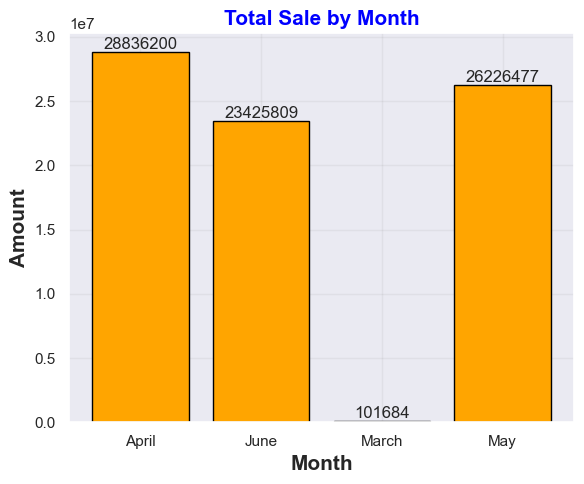

In [13]:
x = Month_Sales["Month"]
y = Month_Sales["Amount"]
plt.figure(figsize = (6, 5))

bar1 = plt.bar(x, y , color = ("Orange"), edgecolor = ("Black"))

for bar in bar1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha = "center", va = "bottom")
plt.xlabel("Month", fontfamily = "Arial", fontweight = "bold", fontsize = 15 )
plt.ylabel("Amount", fontfamily = "Arial", fontweight = "bold", fontsize = 15)
plt.title("Total Sale by Month", fontfamily = "Arial", fontweight = "bold", fontsize = 15, color = "blue")

plt.grid(True, color = "Grey", alpha = 0.1)
plt.tight_layout()

plt.show()

The chart shows that April and May had the highest sales ($28.8M and $26.2M), June saw a slight decline ($23.4M), and March had the lowest sales ($101.7K), indicating a need to investigate March's poor performance.

### SALES STATUS

In [14]:
print ("SALES STATUS OVERVIEW")
Sale_Status = Amazon_Sales[["Status"]].value_counts().reset_index()
Sale_Status

SALES STATUS OVERVIEW


,Status,count
0,Shipped,77815
1,Shipped - Delivered to Buyer,28756
2,Cancelled,18334
3,Shipped - Returned to Seller,1954
4,Shipped - Picked Up,973
5,Pending,658
6,Pending - Waiting for Pick Up,281
7,Shipped - Returning to Seller,145
8,Shipped - Out for Delivery,35
9,Shipped - Rejected by Buyer,11


Most orders were successfully shipped (77,815) and delivered (28,756), while cancellations (18,334) highlight potential issues needing attention. Rare problems like damages (1) and lost shipments (5) show minimal operational disruptions.

### SALES BY SELLER

In [33]:
Sale_Status.to_csv("Sales Status")

In [15]:
seller = Amazon_Sales[["Fulfilment", "Amount"]]
seller

,Fulfilment,Amount
0,Merchant,647.62
1,Merchant,406.00
2,Amazon,329.00
3,Merchant,753.33
4,Amazon,574.00
...,...,...
128971,Amazon,517.00
128972,Amazon,999.00
128973,Amazon,690.00
128974,Amazon,1199.00


In [16]:
Sales_by = seller["Fulfilment"].value_counts().reset_index()
Sales_by

,Fulfilment,count
0,Amazon,89713
1,Merchant,39263


Amazon handled the majority of fulfillments (89,713), while merchants accounted for a smaller share (39,263), highlighting Amazon's dominant role in order processing.

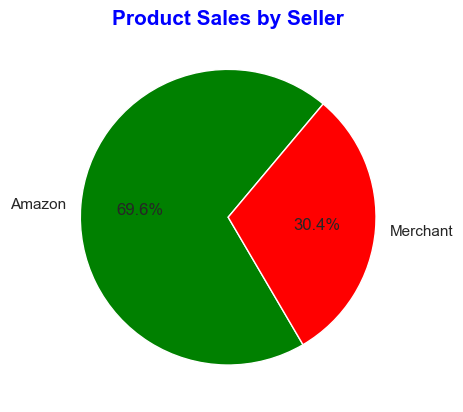

In [17]:
sizes = Sales_by["count"]
label = Sales_by['Fulfilment']
color = ("Green", "Red")

plt.pie(sizes, labels = label, startangle= 50, colors = color, autopct= '%1.1f%%')
plt.title("Product Sales by Seller", fontfamily = "Arial", fontweight = "bold", fontsize = 15, color = "blue")

plt.show()

Amazon accounts for 69.6% of product sales, while merchants contribute 30.4%, reflecting Amazon's dominant market share.

In [18]:
print ("TOTAL SALES BY SELLER")
sales_Record = seller.groupby(["Fulfilment"])[["Amount"]].sum().reset_index()
sales_Record


TOTAL SALES BY SELLER


,Fulfilment,Amount
0,Amazon,54327540.00
1,Merchant,24262630.25


Amazon generated the majority of sales revenue ($54.3M), while merchants contributed $24.3M, emphasizing Amazon's financial dominance.

In [34]:
sales_Record.to_csv("Seller Sales")

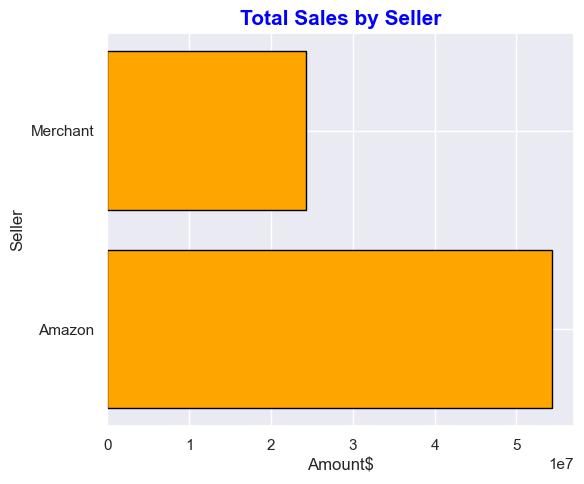

In [19]:
x = sales_Record['Fulfilment']
y = sales_Record["Amount"]

plt.figure(figsize = (6, 5))

plt.barh(x, y , color="orange", edgecolor = "black")


plt.xlabel("Amount$")
plt.ylabel("Seller")
plt.title("Total Sales by Seller", fontfamily = "Arial", fontsize = 15, fontweight = "bold", color = "blue")

plt.tight_layout()

plt.show()

The bar chart illustrates **total sales by seller**, with Amazon significantly outperforming merchants in revenue generation:  

- **Amazon** contributed approximately **$54.3 million**, highlighting its dominant market share and strong customer trust.  
- **Merchants** generated **$24.3 million**, accounting for a smaller yet substantial portion of sales, emphasizing their role as supplementary sellers.  

Amazon’s sales are over **twice** those of merchants, indicating its efficiency in fulfillment and broader customer reach. This dominance may stem from Amazon's established infrastructure, streamlined logistics, and marketing strength.  

Key insight: Merchants still play an essential role in diversifying the marketplace and can be further empowered to increase their contributions.

### SALES CHANNEL

In [20]:

SalesChannel = Amazon_Sales[["Sales Channel", "Amount"]]
SalesChannel

,Sales Channel,Amount
0,Amazon.in,647.62
1,Amazon.in,406.00
2,Amazon.in,329.00
3,Amazon.in,753.33
4,Amazon.in,574.00
...,...,...
128971,Amazon.in,517.00
128972,Amazon.in,999.00
128973,Amazon.in,690.00
128974,Amazon.in,1199.00


In [21]:
SalesChannel['Sales Channel'].value_counts()

Sales Channel
Amazon.in     128852
Non-Amazon       124
Name: count, dtype: int64

The data reveals a significant disparity in order counts between Amazon.in and Non-Amazon platforms:  

- **Amazon.in** processed **128,852 orders**, showcasing its dominance in the e-commerce space with a vast customer base and efficient fulfillment capabilities.  
- **Non-Amazon** platforms handled only **124 orders**, reflecting a minimal market share, which may indicate limited reach, lower visibility, or fewer resources compared to Amazon.  

This stark difference highlights Amazon.in's strong market positioning and customer trust, while Non-Amazon platforms may need to enhance their marketing strategies, logistics, or product offerings to compete effectively.

### SHIPMENT

In [22]:
shipment = Amazon_Sales[["ship-service-level", "Category", "Amount"]]
shipment

,ship-service-level,Category,Amount
0,Standard,T-shirt,647.62
1,Standard,Shirt,406.00
2,Expedited,Shirt,329.00
3,Standard,Blazzer,753.33
4,Expedited,Trousers,574.00
...,...,...,...
128971,Expedited,Shirt,517.00
128972,Expedited,T-shirt,999.00
128973,Expedited,Blazzer,690.00
128974,Expedited,T-shirt,1199.00


In [35]:
shipment.to_csv("Shipemnt Category")

In [23]:
print (shipment['ship-service-level'].value_counts())

print ("  ")

print (shipment['Category'].value_counts())

ship-service-level
Expedited    88630
Standard     40346
Name: count, dtype: int64
  
Category
T-shirt     50292
Shirt       49877
Blazzer     15500
Trousers    10616
Perfume      1157
Wallet        926
Socks         440
Shoes         165
Watch           3
Name: count, dtype: int64


**Shipping Service Levels**  
- **Expedited Service**: 88,630 shipments were expedited, indicating a preference for faster delivery among customers, likely for time-sensitive purchases.  
- **Standard Service**: 40,346 shipments opted for standard delivery, highlighting a cost-effective choice for less urgent orders.  

Expedited services dominate, suggesting a demand for speedy logistics.  

---

### Product Categories  
- **Top Categories**:  
  - **T-shirts** (50,292) and **Shirts** (49,877) account for the majority of sales, reflecting high demand for apparel.  
  - **Blazers** (15,500) and **Trousers** (10,616) further underline the prominence of clothing items.  

- **Niche Categories**:  
  - **Perfume** (1,157) and **Wallets** (926) represent moderate interest in accessories.  
  - **Socks** (440), **Shoes** (165), and **Watches** (3) exhibit limited sales, potentially indicating less focus or demand for these products.  

This breakdown highlights a strong focus on apparel, with opportunities to grow sales in accessory and footwear categories.

In [24]:
Pivot = shipment.pivot_table(index= "Category", columns = "ship-service-level", values = "Amount", aggfunc="sum")
Pivot

ship-service-level,Expedited,Standard
Category,,
Blazzer,6269317.0,4945787.12
Perfume,581747.0,207672.66
Shirt,15162659.0,6135111.08
Shoes,99403.0,25349.76
Socks,86519.0,64238.50
T-shirt,27620183.0,11586573.65
Trousers,4129050.0,1217236.30
Wallet,341361.0,117047.18
Watch,915.0,NaN


In [37]:
Pivot.to_csv("product Expedited and Standard")

**Key Insights**

**Expedited vs. Standard Revenue:** Expedited shipping consistently outperforms standard shipping across all categories, emphasizing customer preference for faster delivery, especially for high-demand items like T-shirts and Shirts.
Top Categories: T-shirts and Shirts dominate sales in both shipping methods, highlighting their importance as key revenue drivers.
Low Revenue Categories: Shoes, Socks, and Watches contribute minimal revenue, presenting an opportunity to reassess product strategy or promotional efforts in these segments.
Luxury Items: Perfumes and Wallets perform moderately, suggesting potential growth through targeted marketing strategies.
This data reinforces the critical role of expedited shipping for maximizing revenue and underscores the dominance of apparel in overall sales.

In [25]:
x1 = Pivot["Expedited"]
x1

Category
Blazzer      6269317.0
Perfume       581747.0
Shirt       15162659.0
Shoes          99403.0
Socks          86519.0
T-shirt     27620183.0
Trousers     4129050.0
Wallet        341361.0
Watch            915.0
Name: Expedited, dtype: float64

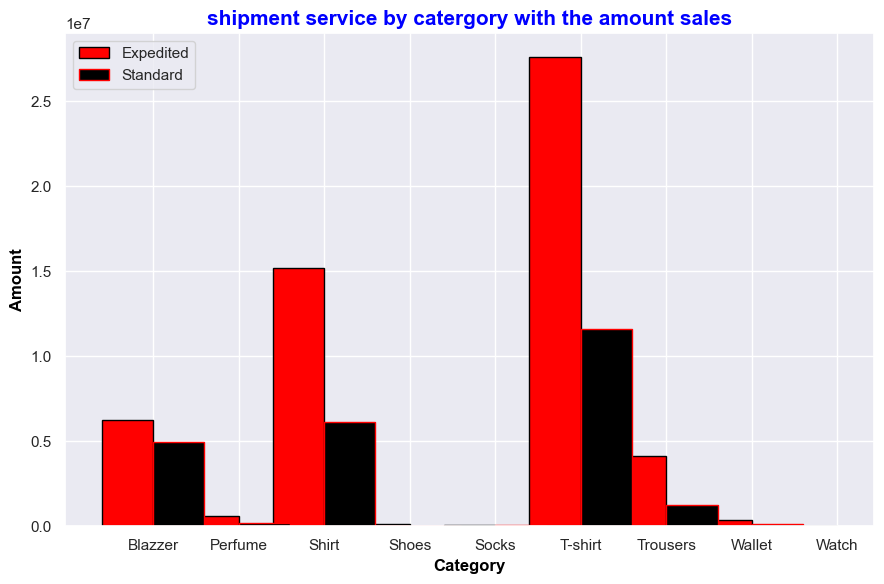

In [26]:
x1 = Pivot["Expedited"]
x2 = Pivot["Standard"]
fig, ax = plt.subplots(figsize = (9,6))
bar_width = 0.6

r1 = range(len(Pivot))
r2 = [x + bar_width for x in r1]
      
b1 = ax.bar(r1, x1, width = bar_width, color = "red", edgecolor = "black", label = "Expedited")
b2 = ax.bar(r2, x2, width = bar_width, color = "black", edgecolor = "red", label = "Standard")

ax.set_xticks([r + bar_width /2 for r in r1])
ax.set_xticklabels(Pivot.index)

plt.xlabel("Category", fontfamily = "Arial", color = "Black", fontsize = 12, fontweight = "bold")
plt.ylabel("Amount",  fontfamily = "Arial", color = "Black", fontsize = 12, fontweight = "bold")
plt.title ("shipment service by catergory with the amount sales",  fontfamily = "Arial", color = "Blue", fontsize = 15, fontweight = "bold")

ax.legend()
plt.tight_layout()

plt.show()

**Insights:**

The data underscores the value of expedited shipping for maximizing revenue in high-demand categories like T-shirts and Shirts.
Low-performing categories such as Shoes, Socks, and Watches may require targeted strategies, including promotions or discounts, to boost their appeal.
Standard shipping remains a secondary choice for most customers, highlighting the importance of maintaining robust expedited shipping options.
This visualization emphasizes the critical role of shipping speed in driving sales, particularly for top-performing categories.

In [27]:
#Total and count of sales category
category_count = Amazon_Sales['Category'].value_counts().reset_index()
category_count


,Category,count
0,T-shirt,50292
1,Shirt,49877
2,Blazzer,15500
3,Trousers,10616
4,Perfume,1157
5,Wallet,926
6,Socks,440
7,Shoes,165
8,Watch,3


**Insights:**
High-demand categories like T-shirts and Shirts may benefit from increased inventory and promotional efforts to sustain their strong performance.
Mid-range categories such as Blazers and Trousers could see growth through targeted marketing campaigns or by bundling with high-demand items.
Low-performing categories like Perfumes, Wallets, and Socks may require better visibility or improved pricing strategies to drive sales.
This analysis highlights the need to focus resources on the best-performing categories while exploring strategies to boost interest and sales in less popular segments.

### CATEGORY SALES

In [28]:
Category_sales = Amazon_Sales.groupby(["Category"])[["Amount"]].sum().reset_index()
Category_sales.sort_values(by= "Amount", ascending = False)

,Category,Amount
5,T-shirt,39206756.65
2,Shirt,21297770.08
0,Blazzer,11215104.12
6,Trousers,5346286.30
1,Perfume,789419.66
7,Wallet,458408.18
4,Socks,150757.50
3,Shoes,124752.76
8,Watch,915.00


In [ ]:
Category_sales

,Category,Amount
0,Blazzer,11215104.12
1,Perfume,789419.66
2,Shirt,21297770.08
3,Shoes,124752.76
4,Socks,150757.50
5,T-shirt,39206756.65
6,Trousers,5346286.30
7,Wallet,458408.18
8,Watch,915.00


In [38]:
Category_sales.to_csv("Category Sales")

**Insights:**
**Investment in Top Categories:**

Expanding inventory and marketing for high-revenue categories like T-shirts and Shirts can sustain their growth.
Offering variety in styles and competitive pricing may further boost sales.
Growth Potential for Moderate Performers:

Blazers and Trousers have room for improvement and could benefit from targeted promotions or bundling strategies with top categories.

**Strategies for Low-Revenue Items:**

Perfumes, Wallets, and Socks may require better marketing visibility, unique selling propositions, or competitive pricing to drive sales.
Low-performing categories like Shoes and Watches might need reassessment of their product appeal or stocking strategy.
This analysis highlights the dominance of apparel categories like T-shirts and Shirts in sales revenue, with opportunities to maximize performance across other segments.

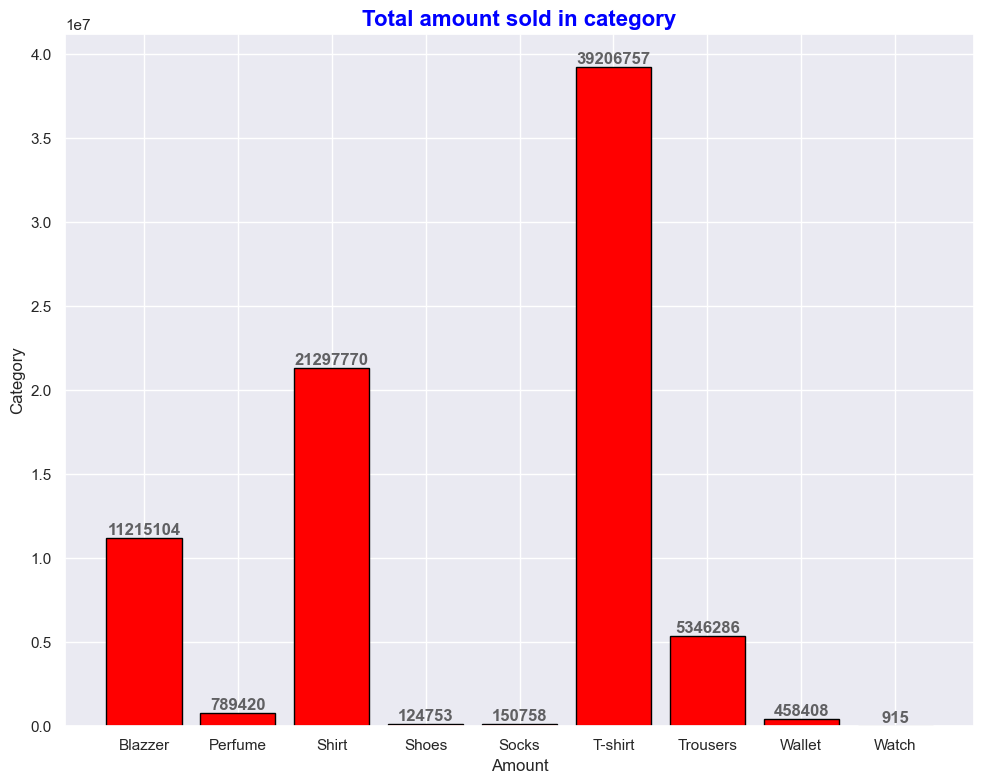

In [30]:
x = Category_sales["Category"]
y = Category_sales["Amount"]
plt.figure(figsize = (10, 8))

bar = plt.bar(x, y, color = "red", edgecolor = "black")

for bar in bar:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval , round(yval), ha = "center", va = "bottom", alpha = 0.7, fontfamily = "arial", fontweight = "bold")


plt.xlabel("Amount")
plt.ylabel("Category")
plt.title("Total amount sold in category", fontfamily = "Arial", fontsize = 16, color  = "Blue", fontweight = "bold")

plt.tight_layout()
plt.show()

**Insights and Recommendations:**
**Focus on Apparel:**
Expanding T-shirt and Shirt inventories can leverage their high sales potential.

**Boost Moderate Categories:**
Enhance marketing efforts for Blazers and Trousers to increase their appeal.

**Reassess Low Performers:**
Investigate the low sales of categories like Shoes and Watches to identify potential barriers, such as limited stock or low demand.

This bar chart effectively highlights the disparities in revenue across categories, guiding strategic inventory and marketing decisions.

### Recommendation
Based on the analysis, it is recommended that the client focuses on the following strategies to maximize profitability and enhance sales performance:

**Prioritize High-Performing Categories:**

Increase inventory and marketing budgets for T-shirts and Shirts, as they contribute the largest share of revenue. Consider seasonal promotions to further boost sales.

**Optimize Underperforming Categories:**

Reevaluate product strategies for Perfumes, Shoes, and Watches by introducing competitive pricing, product bundling, and enhanced marketing campaigns to improve their appeal.

**Capitalize on Expedited Shipping Demand:**

Promote expedited shipping options for premium and high-demand products to encourage repeat purchases and customer satisfaction.

**Enhance Customer Engagement:**

Use customer feedback and preferences to refine product offerings, especially for moderate and low-performing categories like Blazers, Trousers, and Wallets.

**Leverage Data Insights for Campaigns:**

Use targeted advertising for specific categories based on their sales trends and customer demographics to drive conversions.

### Conclusion
The analysis reveals strong opportunities in high-demand categories such as T-shirts and Shirts, which dominate the sales portfolio. By addressing gaps in underperforming categories and capitalizing on customer preferences for expedited shipping, the client can achieve sustained growth and improved market presence. Strategic investments in product optimization and customer engagement will ensure long-term profitability and enhanced customer loyalty.